# นายมูฮำหมัด ปูตีล่า รหัส 162404140037 Lab09 

In [335]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [336]:

#generate my kernel
cross_3x3 = np.array([[0,1,0],[1,1,1],[0,1,0]],dtype=np.uint8)
print("Kernel or Structuring Element Cross 3x3")
print(cross_3x3)
rectangle_3x3 = np.ones((3,3),dtype=np.uint8)
print("Kernel or Structuring Element Rectangle 3x3")
print(rectangle_3x3)
eiei_3x3 = np.array([[0,0,0],[0,1,1],[0,1,1]],dtype=np.uint8)
print("Kernel or Structuring MyCustom 3x3")
print(eiei_3x3)



Kernel or Structuring Element Cross 3x3
[[0 1 0]
 [1 1 1]
 [0 1 0]]
Kernel or Structuring Element Rectangle 3x3
[[1 1 1]
 [1 1 1]
 [1 1 1]]
Kernel or Structuring MyCustom 3x3
[[0 0 0]
 [0 1 1]
 [0 1 1]]


In [337]:
#USE cv.getStructuringElement()
rect3x3 = cv.getStructuringElement(cv.MORPH_RECT,(3,3))
cross3x3 = cv.getStructuringElement(cv.MORPH_CROSS,(3,3))
ellipse3x3 = cv.getStructuringElement(cv.MORPH_ELLIPSE,(3,3))
rect5x5 = cv.getStructuringElement(cv.MORPH_RECT,(5,5))
cross5x5 = cv.getStructuringElement(cv.MORPH_CROSS,(5,5))
ellipse5x5 = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))
print(rect3x3)
print(cross3x3)
print(ellipse3x3)
print(rect5x5)
print(cross5x5)
print(ellipse5x5)
#ractangle 3x3

[[1 1 1]
 [1 1 1]
 [1 1 1]]
[[0 1 0]
 [1 1 1]
 [0 1 0]]
[[0 1 0]
 [1 1 1]
 [0 1 0]]
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
[[0 0 1 0 0]
 [0 0 1 0 0]
 [1 1 1 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]
[[0 0 1 0 0]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [0 0 1 0 0]]


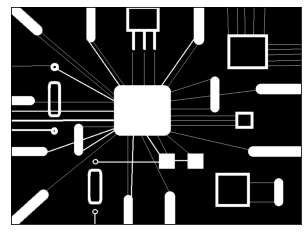

In [338]:
##Load Circuit Image / Convert2Binary
src = cv.imread("./circuit.png")
gray_img = cv.cvtColor(src,cv.COLOR_BGR2GRAY)
__,binary_img = cv.threshold(gray_img,127,255,cv.THRESH_BINARY)
plt.imshow(binary_img,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()


Original Binary


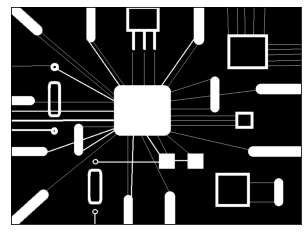

Result from eroded_rect5x5


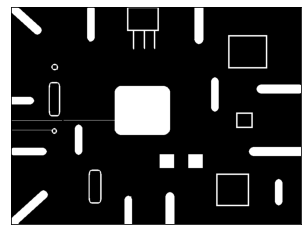

Result from eroded_cross5x5


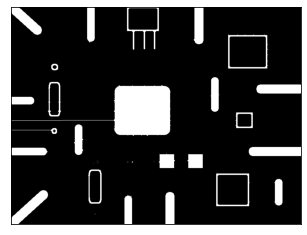

Result from eroded_ellipse5x5


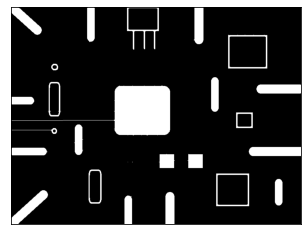

In [339]:
#test Morph
show_eroderect5x5= cv.erode(binary_img,rect5x5,iterations=1)
show_erodecross3x3 = cv.erode(binary_img,cross5x5,iterations=1)
show_ellipse5x5 = cv.erode(binary_img,ellipse5x5,iterations=1)
#iterations = 1 คือ 1 รอบ
print("Original Binary")
plt.imshow(binary_img,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()
print("Result from eroded_rect5x5")
plt.imshow(show_eroderect5x5,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()
print("Result from eroded_cross5x5")
plt.imshow(show_erodecross3x3,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()
print("Result from eroded_ellipse5x5")
plt.imshow(show_ellipse5x5,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()

Original Binary


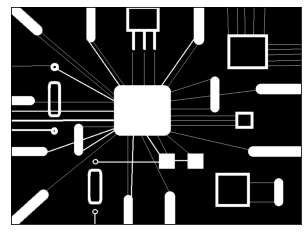

Result from eroded_rect5x5


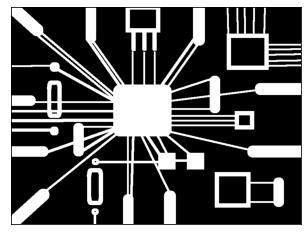

Result from eroded_cross5x5


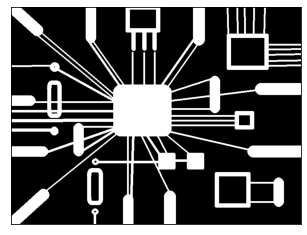

Result from eroded_ellipse5x5


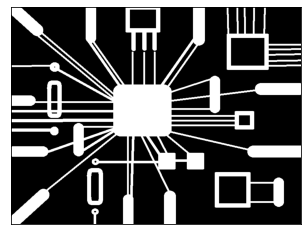

In [340]:
dilate_eroderect5x5= cv.dilate(binary_img,rect5x5,iterations=1)
dilate_erodecross3x3 = cv.dilate(binary_img,cross5x5,iterations=1)
dilate_ellipse5x5 = cv.dilate(binary_img,ellipse5x5,iterations=1)

print("Original Binary")
plt.imshow(binary_img,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()
print("Result from eroded_rect5x5")
plt.imshow(dilate_eroderect5x5,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()
print("Result from eroded_cross5x5")
plt.imshow(dilate_erodecross3x3,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()
print("Result from eroded_ellipse5x5")
plt.imshow(dilate_ellipse5x5,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()

 ทำตามคำสั่ง 6.1 6.2 โดยใช้การ Dilate Erode Opening Closing โดยสามารถเลียนแบบcodeในข้อ 4 และ 5

      6.1 ให้นำเส้นสายสัญญาณทั้งหมดออกให้เหลือแค่ Component

      6.2 ให้เพิ่มขนาดสายสัญญาณทุกเส้น

Original Binary


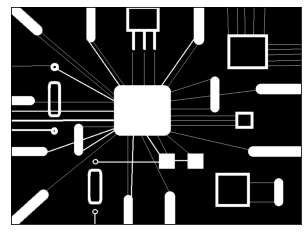

Result from eroded_ellipse 3x3


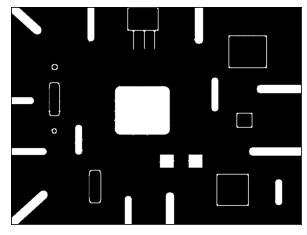

In [341]:
res_ellipse3x3  = cv.getStructuringElement(cv.MORPH_ELLIPSE,(3,3))
show_ellipse3x3  = cv.erode(binary_img,res_ellipse3x3 ,iterations=3)
#iterations = 1 คือ 1 รอบ
print("Original Binary")
plt.imshow(binary_img,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()
print("Result from eroded_ellipse 3x3")
plt.imshow(show_ellipse3x3,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()

#------------------------------


Original Binary


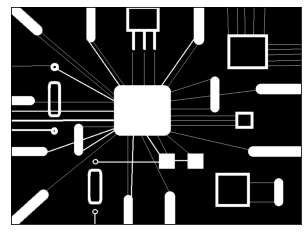

Result from eroded_ellipse 3x3


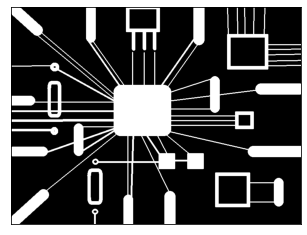

In [342]:

dilate_ellipse5x5 = cv.dilate(binary_img,res_ellipse3x3 ,iterations=1)
print("Original Binary")
plt.imshow(binary_img,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()
print("Result from eroded_ellipse 3x3")
plt.imshow(dilate_ellipse5x5,cmap='gray'),plt.xticks([]),plt.yticks([])
plt.show()
